In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ev9XOLsIzZL_Z391GoAx-ehbAYmN4TolO7u0iw2c-8u3',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibmhc-donotdelete-pr-lo5jstwav41ki9'
object_key = 'Placement_Data_Full_Class.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [2]:
df = pd.read_csv('/Users/adithibhatta/Downloads/Placement_Data_Full_Class.csv')

In [2]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [27]:
df.shape

(215, 15)

In [28]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [29]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,281283.720930
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,78232.510303
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [31]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [32]:
df.nunique()

sl_no             215
gender              2
ssc_p             103
ssc_b               2
hsc_p              97
hsc_b               2
hsc_s               3
degree_p           89
degree_t            3
workex              2
etest_p           100
specialisation      2
mba_p             205
status              2
salary             45
dtype: int64

In [33]:
df["gender"].value_counts()

M    139
F     76
Name: gender, dtype: int64

In [34]:
df["status"].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

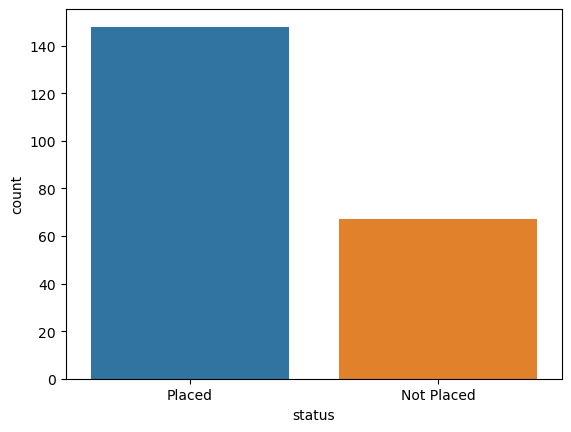

In [35]:
sns.countplot(x='status' , data = df)

<AxesSubplot:xlabel='gender', ylabel='count'>

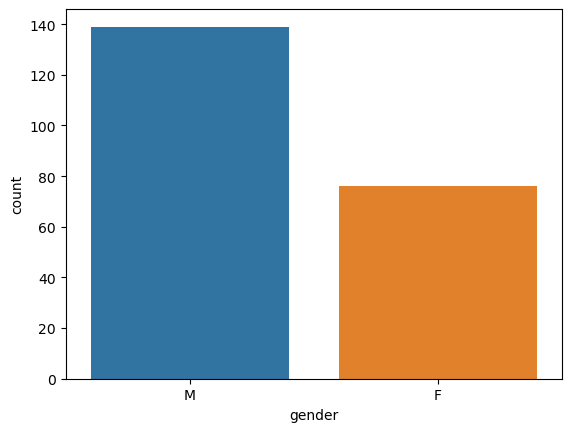

In [36]:
sns.countplot(x='gender' , data = df)

<AxesSubplot:xlabel='status', ylabel='count'>

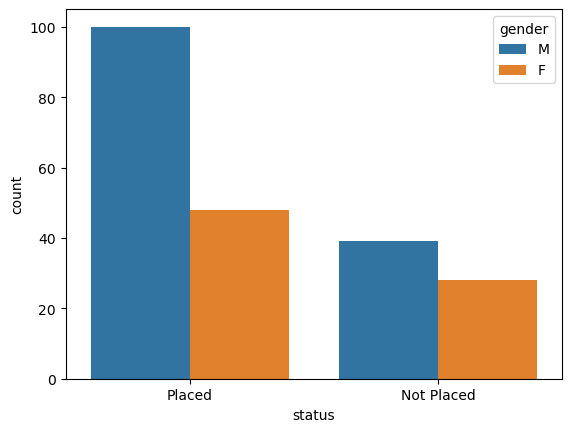

In [37]:
sns.countplot(x="status",hue="gender",data=df)

<AxesSubplot:>

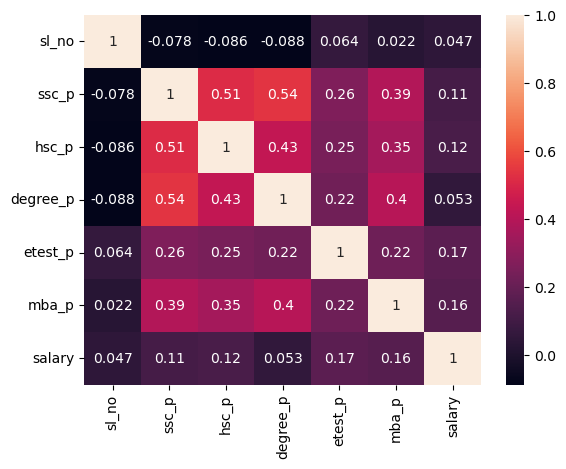

In [38]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='degree_t', ylabel='status'>

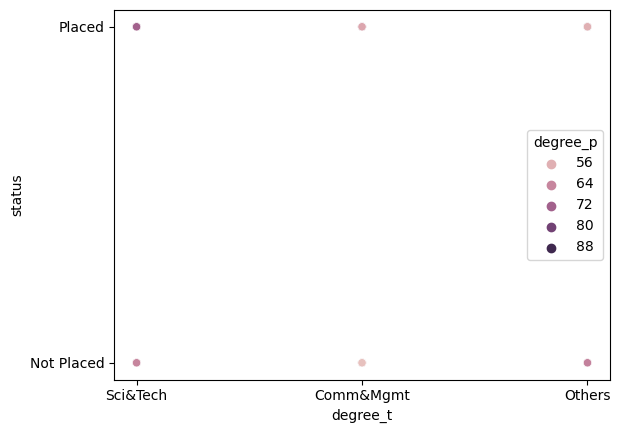

In [39]:
sns.scatterplot(x='degree_t', y='status',hue='degree_p', data=df)

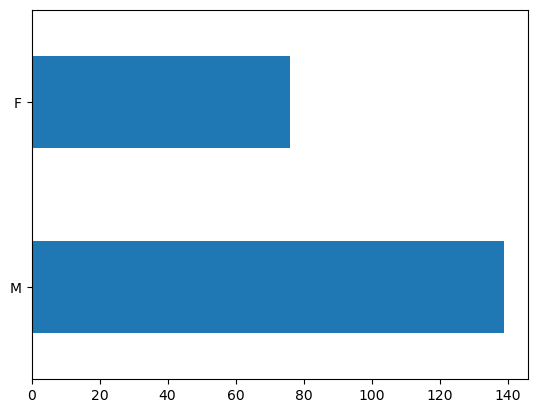

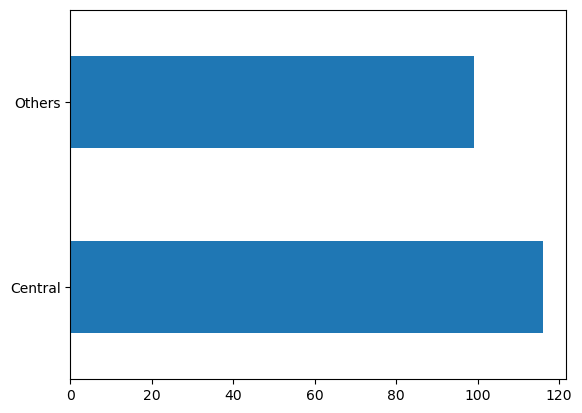

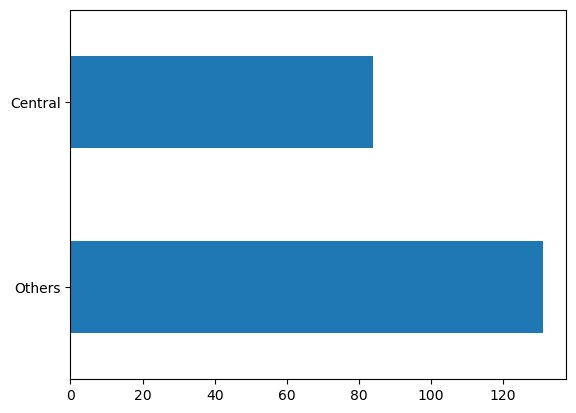

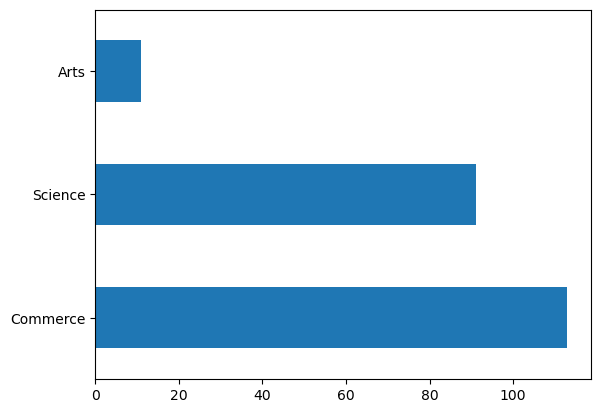

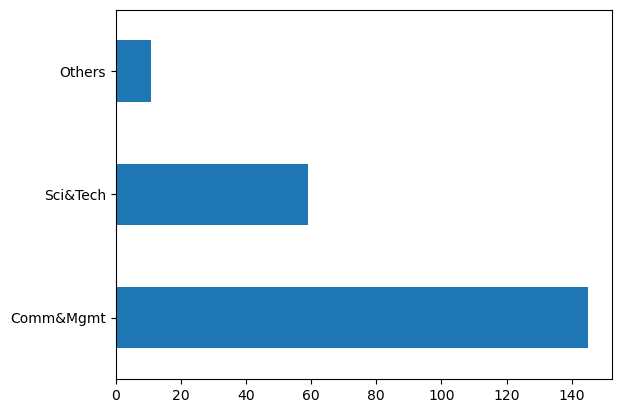

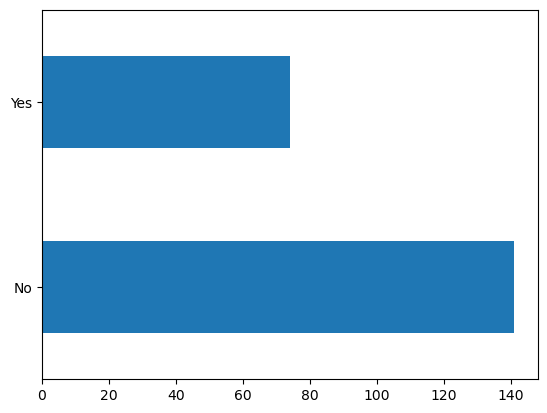

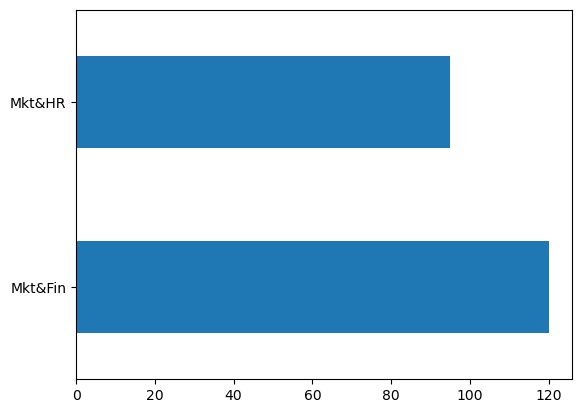

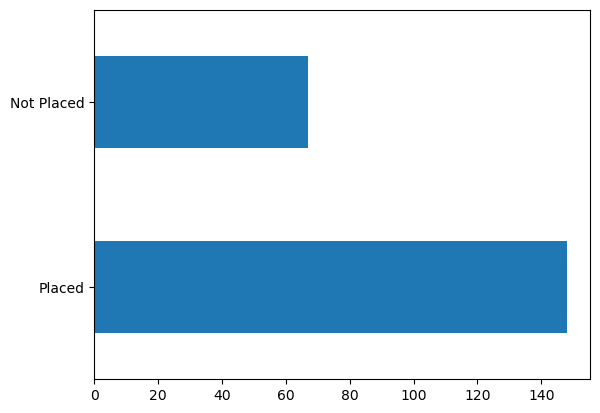

In [40]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i].value_counts().plot(kind="barh")
        plt.show()

sl_no


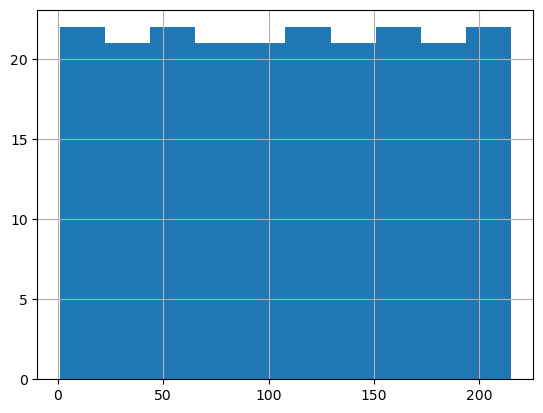

ssc_p


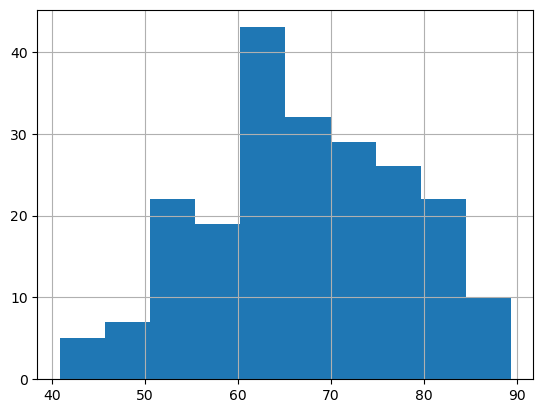

hsc_p


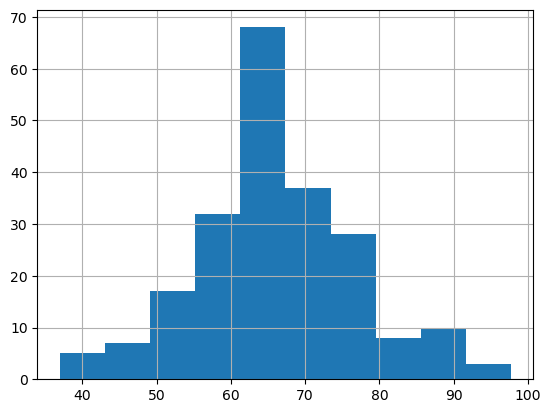

degree_p


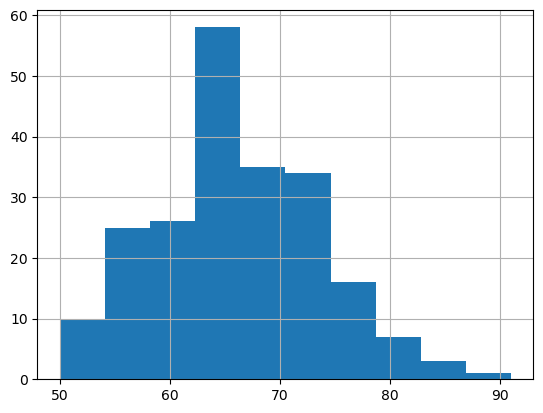

etest_p


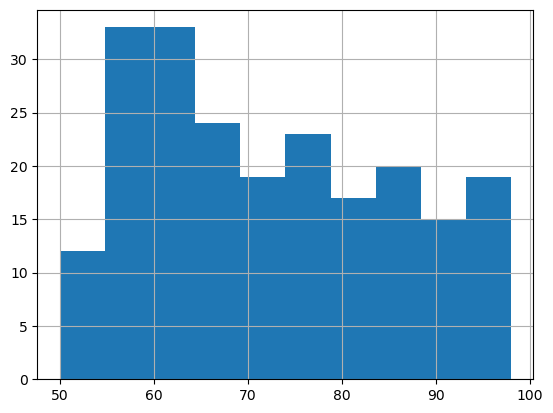

mba_p


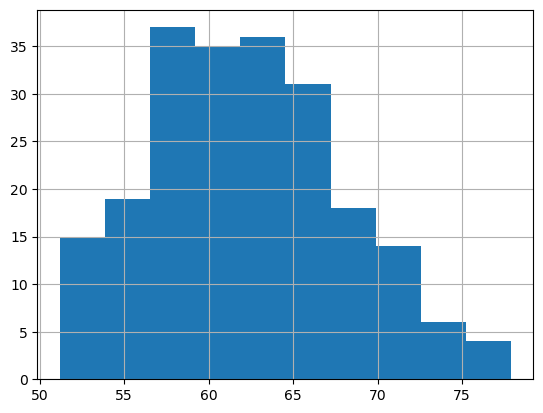

salary


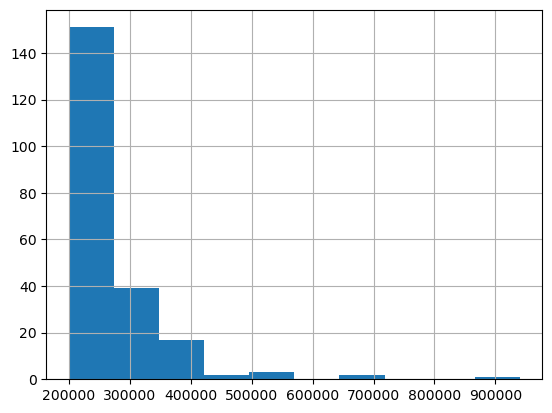

In [41]:
for i in df.columns:
    if df[i].dtypes!="object":
        print(i)
        df[i].hist()
        plt.show()

In [42]:

df.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,265000.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,82.00,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,60.00,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,67.00,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,66.00,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=['gender','hsc_s','degree_t','workex','specialisation','status']
for i in lst:
  df[i]=le.fit_transform(df[i])

In [44]:
df

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,265000.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,82.00,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,60.00,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,67.00,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,66.00,1,58.00,0,0,70.0,1,60.23,1,204000.0


In [45]:
df.dtypes

gender              int64
ssc_p             float64
hsc_p             float64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [46]:
df['salary'].fillna(df['salary'].median() , inplace = True)

In [47]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [48]:
df.dtypes

gender              int64
ssc_p             float64
hsc_p             float64
hsc_s               int64
degree_p          float64
degree_t            int64
workex              int64
etest_p           float64
specialisation      int64
mba_p             float64
status              int64
salary            float64
dtype: object

In [49]:
X=df.iloc[:,:10]
y=df.iloc[:,-2]


In [50]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
X_sc=m.fit_transform(X)
X_sc

array([[1.        , 0.53823954, 0.88962109, ..., 0.10416667, 1.        ,
        0.28448276],
       [1.        , 0.79241394, 0.68088962, ..., 0.76041667, 0.        ,
        0.56484258],
       [1.        , 0.49701093, 0.5107084 , ..., 0.52083333, 0.        ,
        0.2470015 ],
       ...,
       [1.        , 0.53823954, 0.49423394, ..., 0.1875    , 0.        ,
        0.69377811],
       [0.        , 0.68253968, 0.47775947, ..., 0.41666667, 1.        ,
        0.33808096],
       [1.        , 0.43516801, 0.34596376, ..., 0.8125    , 1.        ,
        0.33770615]])

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [52]:
import warnings
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier

from sklearn.metrics import ConfusionMatrixDisplay,classification_report
warnings.filterwarnings('ignore')

In [53]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred5=ad.predict(X_test)
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.90      1.00      0.95        28

    accuracy                           0.93        43
   macro avg       0.95      0.90      0.92        43
weighted avg       0.94      0.93      0.93        43



In [54]:
pickle.dump(ad, open('model.pkl','wb'))

In [55]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.8 MB/s eta 0:00:0000:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.316
    Uninstalling ibm-watson-machine-learning-1.0.316:
      Successfully uninstalled ibm-watson-machine-learning-1.0.316


In [56]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [63]:
wml_credentials = {
    "apikey":"4Vwns0VKlO-EeSM_zIcS0k5lCzE6vSqX1CH-mc-EXBVf",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [64]:
wml_client = APIClient(wml_credentials)

In [65]:
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
52a4953e-0fc8-415c-8509-0add7a1170ed  IBM_HC_DEPLOY  2023-09-02T06:37:47.281Z
------------------------------------  -------------  ------------------------


,ID,NAME,CREATED
0,52a4953e-0fc8-415c-8509-0add7a1170ed,IBM_HC_DEPLOY,2023-09-02T06:37:47.281Z


In [66]:
SPACE_ID = "52a4953e-0fc8-415c-8509-0add7a1170ed"

In [67]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [69]:
MODEL_NAME = 'demomodel'
DEPLOYMENT_NAME = 'demoModelDep'
BEST_MODEL = ad

In [71]:
software_spec_uid = wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [74]:
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.1',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
    
}

In [79]:
model_details = wml_client.repository.store_model(
model = BEST_MODEL,
meta_props = model_props,
training_data = X_train,
training_target = y_train)

In [80]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'status',
  'schemas': {'input': [{'fields': [{'name': 'gender', 'type': 'int64'},
      {'name': 'ssc_p', 'type': 'float64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'hsc_s', 'type': 'int64'},
      {'name': 'degree_p', 'type': 'float64'},
      {'name': 'degree_t', 'type': 'int64'},
      {'name': 'workex', 'type': 'int64'},
      {'name': 'etest_p', 'type': 'float64'},
      {'name': 'specialisation', 'type': 'int64'},
      {'name': 'mba_p', 'type': 'float64'}],
     'id': '1',
     'type': 'struct'}],
   'output': []},
  'software_spec': {'id': 'b56101f1-309d-549b-a849-eaa63f77b2fb',
   'name': 'runtime-22.2-py3.10'},
  'training_data_references': [{'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'gender', 'type': 'int64'},
      {'name': 'ssc_p', 'type': 'float64'},
      {'name': 'hsc_p', 'type': 'float64'},
      {'name': 'hsc_s', 'type': 'int64'},
      {'name': 'degree_p',

model_uid = wml_client.repository.get_model_id(model_details)

In [82]:
model_uid = wml_client.repository.get_model_id(model_details)
model_uid

'6d461a32-26fd-4cb1-8c31-3764ce52b23c'

In [85]:
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME: DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [86]:
deployment1 = wml_client.deployments.create(
   artifact_uid = model_uid,
   meta_props = deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '6d461a32-26fd-4cb1-8c31-3764ce52b23c' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='61f39134-0649-46ec-922e-78a6e730646f'
------------------------------------------------------------------------------------------------


